# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [173]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [174]:
from sklearn.linear_model import Perceptron

#set up perceptron model with Learning rate 0.1, max epochs, and no shuffling
clf = Perceptron(shuffle=False, verbose=1, eta0=.1)

#import the data from arff file into a numpy array of floats
Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)

#separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

#train the model, printing results after each epoch
clf.fit(X, y)

print(clf.coef_) #print the weights
print(clf.intercept_)  #print the bias rate
print(clf.score(X, y))  #mean accuracy

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.01 seconds.
--

Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (15%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [175]:
def run_perceptron(data_set):
    """
    Run the Perceptron model on a specified data set

    Args:
        data_set (string): the .arff set used for the inputs and target

    Perceptron specifications:
        shuffle=False: No shuffling
        verbose=1: Print information after each epoch
        eta0=.1: Learning rate is 0.1
        max_iter=10: Runs through 10 epochs at max
        By default, the initial rates are all 0 and there is a bias

    Output:
        print the data from perceptron in each epoch
        print the final weights
        print the final bias rate
        print the mean accuracy
    """
    #set up perceptron model with Learning rate 0.1, max epochs, and no shuffling
    clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10)

    #import the data from arff file into a numpy array of floats
    Data_Set = arff.loadarff(data_set)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)

    #separate data into array of inputs and targets
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]

    #train the model, printing results after each epoch
    clf.fit(X, y)

    print("Weights: ", clf.coef_) #print the weights
    print("Bias: ", clf.intercept_)  #print the bias rate
    print("Accuracy: ", clf.score(X, y))  #mean accuracy

In [176]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

run_perceptron("eval.arff")

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.01

In the code above, I created a function to train the Perceptron for me with the specified parameters for this lab. The function sets of the Perceptron model as an variable named clf. Then it loads the data from the data set, splits it into the input and target set, and trains the model. Finally, it prints out the results.

After running the Perceptron on the evaluation set, the training converged in 9 epochs. It has the final weights [-4.28857497 -2.390381   -3.0160324  -1.1686672 ] with a bias of 5.2 and mean accuracy of 97.67%. This is a very high accuracy meaning that the model will likely generalize well. I was surprised to see how quickly the weights converged. I believe that it is becuase the training set was quite small.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.



In [177]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.

# I created the two data sets as arff files in a local folder with a text editor

#Linearly Seperable file
"""
@relation linearly_separable
@attribute a1 real
@attribute a2 real
@attribute class {0,1}
@data
-0.3, 0.8, 1
0.2, 0.7, 1
-0.04, 0.1, 1
-0.4, 0.3, 1
-0.5, -0.9, 0
0.54, -0.75, 0
0.6, 0.2, 0
0.3, -0.02, 0
"""


#Non linearly separable file
"""
@relation linearly_separable
@attribute a1 real
@attribute a2 real
@attribute class {0,1}
@data
-0.1, -0.8, 1
0.32, 0.17, 1
-0.08, -0.82, 1
-.8, 0.1, 1
-0.09, -0.81, 0
-0.77, 0.14, 0
0.2, 0.42, 0
-0.3, -0.07, 0
"""

'\n@relation linearly_separable\n@attribute a1 real\n@attribute a2 real\n@attribute class {0,1}\n@data\n-0.1, -0.8, 1\n0.32, 0.17, 1\n-0.08, -0.82, 1\n-.8, 0.1, 1\n-0.09, -0.81, 0\n-0.77, 0.14, 0\n0.2, 0.42, 0\n-0.3, -0.07, 0\n'

### 2.2 (5%) Train on both sets using the scikit-learn perceptron model

In [178]:
# Train on each and print the results. Train until convergence (i.e. use the default max_iter).
# You may choose your other hyperparameters.

print("Linearly Separable")
run_perceptron("linearly_separable.arff")
print()
print("Not Linearly Separable")
run_perceptron("non_linearly_separable.arff")

Linearly Separable
-- Epoch 1
Norm: 0.16, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.011125
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.22, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.004375
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 24, Avg. loss: 0.009600
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 48, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 56, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 64, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 72, Avg. loss: 0.000000
Total training time: 0.01

I created both of the data sets as arff files in the text editor on my local file system. To make the linearly separable on, I made each a2 value greater than the a1 value for the target output 1. And, for the target output 2, I made each a1 value greater than the a2 value. Therefore, I knew that the data set was linearly separable by at least the line y=x.

After running the Perceptron, the model on the Linearly Separable data converged after 9 epochs, with the final weights [-0.84,0.21], no bias, and an accuracy of 100%. This was expected since I purposely made the data easy to separate.

For the data file of non-linearly-separable data points, I made the data more random and purposely made some inputs with target output 1 really similar to other inputs with target output 0. The model on this data converged after 6 epochs with the final weights [-0.84,0.21], a bias of -0.1, and an accuracy of 0.5. This accuracy was also expected since I purposely made the data difficuly to separate. But, I was surprised to see how quickly it converged. This must be becuase after the 6th epoch, the accuracy was already maximized.

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Percptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

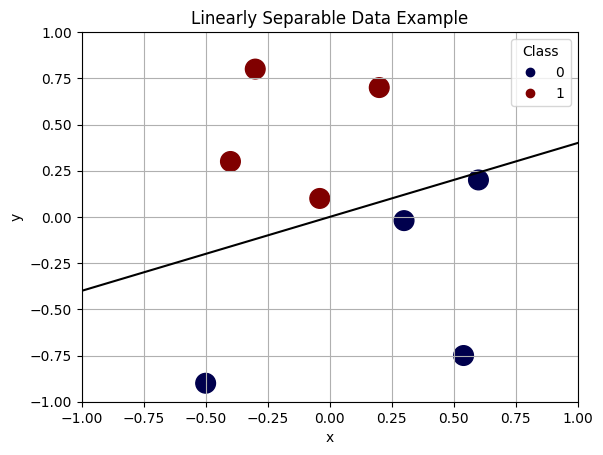

In [179]:
import matplotlib.pyplot as plt

#import the linearlt separable data from arff file into a numpy array of floats
lin_sep_data = arff.loadarff("linearly_separable.arff")
lin_sep_data_df = pd.DataFrame(lin_sep_data[0])
lin_sep_data_np = lin_sep_data_df.to_numpy()
lin_sep_data_np = lin_sep_data_np.astype(float)

#separate data into array of inputs and targets
lin_sep_X = lin_sep_data_np[:, :-1]
lin_sep_y = lin_sep_data_np[:, -1]

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(lin_sep_X[:,0], lin_sep_X[:,1], c = lin_sep_y, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend


# Plot the learned separator
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = 0.084/0.21  # calculated from learned weights [-0.084  0.21 ]
intercept = 0 # calculated from the Bias 0
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

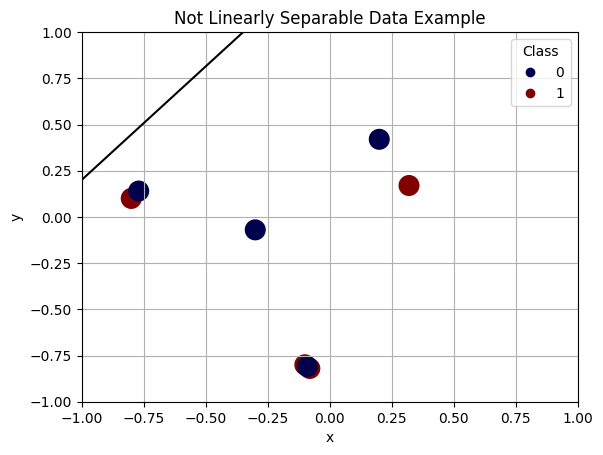

In [180]:
# Graph datasets and decision lines for both cases.

import matplotlib.pyplot as plt

#import the linearlt separable data from arff file into a numpy array of floats
non_lin_sep_data = arff.loadarff("non_linearly_separable.arff")
non_lin_sep_data_df = pd.DataFrame(non_lin_sep_data[0])
non_lin_sep_data_np = non_lin_sep_data_df.to_numpy()
non_lin_sep_data_np = non_lin_sep_data_np.astype(float)

#separate data into array of inputs and targets
non_lin_sep_X = non_lin_sep_data_np[:, :-1]
non_lin_sep_y = non_lin_sep_data_np[:, -1]

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(non_lin_sep_X[:,0], non_lin_sep_X[:,1],
                      c = non_lin_sep_y, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1),
                    title="Class", loc='upper right') # Legend


# Plot the learned separator
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = 0.086/0.07  # Calculated from the Weights:  [ 0.086 -0.07 ]
intercept = -0.1/-0.07 # calculated from the Bias -0.1 and weight -0.07
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Not Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

I used Matplotlib to graph the two sets of data. And, I found the equation of the line to seperate them by plugging the weights into x_2=(-w_1/w_2)x_1+bias/w_2.

After graphing the data, the first set is clearly linearly separable. The Perceptron model used the line y=0.4x to seperate the data. Clearly, all the red points (class = 1) are above the line and all the blue points (class = 0) are below the line. This explains why the model had 100% accuracy.

And second set of data is clearly not linearly separable. There is no possible line that can seperate the blue points from the red ones. This is because I purposely made the data impossible to separate. For example how there at two points of class 1 and one of class 0 all clustered near (-0.1,-0.8). So, the model did the best it could, creating a line at y=1.23x+1.43, which above all of the data points. This makes perfect sense since the model only has 50% accuracy and half of the data belongs to each class.

### 2.4 (5%) Discuss why the perceptron won’t get perfect accuracy on non-linearly separable data

Perceptron will not get perfect accuracy on non-linearly separable data because it is mathematically impossible. In the example above, for example, no matter how many different lines we try, we will never be able to create a decision boundary that separates the two classes. So, when the data is not linearly separable, at least one data point will be on the incorrect side of the decision boundary. And, since the accuracy is a measure based on the difference between the target output and correct classification, it will always be less than 100%

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [181]:
from sklearn.model_selection import train_test_split

def run_perceptron_splits(data_set):
    """
    Run the Perceptron model on a specified data set

    Args:
        data_set (string): the .arff set used for the inputs and target

    Perceptron specifications:
        shuffle=False: No shuffling
        verbose=1: Print information after each epoch
        eta0=1: Learning rate is 1
        By default, the initial rates are all 0 and there is a bias

    Output:
        clf.score(X_train, y_train): Training Accuracy
        clf.score(X_test, y_test): Test Accuracy
        clf.n_iter_: Number of epochs
        clf.coef_: weights
        clf.intercept_: Bias
    """
    #set up perceptron model with Learning rate 1, and no shuffling
    clf = Perceptron(shuffle=False, verbose=0, eta0=1)

    #import the data from arff file into a numpy array of floats
    Data_Set = arff.loadarff(data_set)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()

    #separate data into array of inputs and targets
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]

    #convert bytes with "yes" to 1, and bytes with "no" to 0
    X[X == b'y'] = 1
    X[X == b'n'] = 0
    X = X.astype(float)

    #convert class of republican to 1, and class of democrat to 0
    y[y == b'republican'] = 1
    y[y == b'democrat'] = 0
    y = y.astype(float)

    #randomly split the data into test and training (70%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    #train the model
    clf.fit(X_train, y_train)

    #return data of the model
    return clf.score(X_train, y_train), clf.score(X_test, y_test), clf.n_iter_, clf.coef_, clf.intercept_

In [182]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice

from tabulate import tabulate
table_data = [["Trial", "Training Accuracy",	"Test accuracy",	"Number of epochs"]]

#Run the perceptron 5 times with different splits and gather data
for i in range(5):
    training_accuracy, test_accuracy, epochs, weight, bias = run_perceptron_splits("voting.arff")
    data_to_add = [i+1, training_accuracy, test_accuracy, epochs]
    table_data.append(data_to_add)

#Make a table
table = tabulate(table_data, headers="firstrow")
print(table)


  Trial    Training Accuracy    Test accuracy    Number of epochs
-------  -------------------  ---------------  ------------------
      1             0.968944         0.956835                  12
      2             0.940994         0.928058                  12
      3             0.947205         0.942446                  10
      4             0.903727         0.884892                  12
      5             0.965839         0.928058                  16


### 3.2 (5%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [183]:
def run_perceptron_after_training(data_set):
    """
    Run the Perceptron model on a full data set (after training)

    Args:
        data_set (string): the .arff set used for the inputs and target

    Perceptron specifications:
        shuffle=False: No shuffling
        verbose=1: Print information after each epoch
        eta0=1: Learning rate is 1
        By default, the initial rates are all 0 and there is a bias

    Output:
        clf.score(X, y): Accuracy
        clf.n_iter_: Number of epochs
        clf.coef_: weights
        clf.intercept_: Bias
    """
    #set up perceptron model with Learning rate 1, and no shuffling
    clf = Perceptron(shuffle=False, verbose=0, eta0=1)

    #import the data from arff file into a numpy array of floats
    Data_Set = arff.loadarff(data_set)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()

    #separate data into array of inputs and targets
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]

    #convert bytes with "yes" to 1, and bytes with "no" to 0
    X[X == b'y'] = 1
    X[X == b'n'] = 0
    X = X.astype(float)

    #convert class of republican to 1, and class of democrat to 0
    y[y == b'republican'] = 1
    y[y == b'democrat'] = 0
    y = y.astype(float)

    #train the model
    clf.fit(X, y)

    #return data of the model
    return clf.score(X, y), clf.n_iter_, clf.coef_, clf.intercept_

In [184]:
#Learn once on the full voting data set
accuracy, epochs, weights, bias = run_perceptron_after_training("voting.arff")
print("After running the model on the whole data set....")
print("Accuracy: ", accuracy)
print("Number of epochs: ", epochs)
print("Final weights: ", weight)
print("Final bias: ", bias)

After running the model on the whole data set....
Accuracy:  0.9674620390455532
Number of epochs:  8
Final weights:  [[ -2.   0. -13.  24.   3.  -5.   7.   4.  -6.   5. -11.  -4.  -3.   4.
   -6.   1.]]
Final bias:  [-9.]


To set up the Perceptron, I first need to convert the byte data into binary (1's and 0's). So, I set the republican class to be 1 and the democratic class to be 0. Also, for the input data, I set the "yes" answers to be 1 and the "no" answers to be 0. Then, after converting the data into arrays of binary numbers, the Perceptron model could be run. I ran it 5 times on random splits between the training and test sets. These trials were about 85-97% accurate.

Next, I ran the Perceptron model on the entire data set, the model was 96.75% accurate, which is surprisingly high. And, the model converged to its solution after just 8 epochs. Apparently, it is quite easy to predict if someone is Republican or Democratic.

The model's final bias was -9. This means that, according to the model, if none of the issues were to matter, an average person is more likely to be democratic (since the class was set at 0, which is less than 1).

Also, the final weights can help identify which issues matter more. In this specific model, the inputs with the highest magnitudes were the 3rd, 4th, and 12th. The 3rd input value (adoption of the budget resolution) had a value of -11. This means that the people who agree with the budget resolution are much more likely to be democratic. The 4th input value (physician free freeze) had a value of 16. This is an extremely high number and means that there is a high probability that the people who agree with the fee freeze are republicans. Finally, the 12th input value (education spending) had a value of -14. Once again, this means the people who support education spending are more likely to be democratic.

I found this experiment to be really interesting. A computer really can accurately predict the political party of someone. And, it is even able to discern which issues are more important for each party.


### 3.3 (10%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial rate should be about 50% and let that be your first point on your graph.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [185]:
def run_perceptron_miscallification(data_set):
    """
    Run the Perceptron model, epoch by epoch on a full data set

    Args:
        data_set (string): the .arff set used for the inputs and target

    Perceptron specifications:
        shuffle=False: No shuffling
        verbose=1: Print information after each epoch
        eta0=1: Learning rate is 1
        By default, the initial rates are all 0 and there is a bias

    Output:
        miscallification_rate: list of the rate after each epoch
    """
    miscallification_rate = [0.5]  #assume the rate is 50% at 0th epoch
    #set up perceptron model with Learning rate 1, max epochs, and no shuffling
    clf = Perceptron(shuffle=False, verbose=1, eta0=1, warm_start=True,
                     max_iter=1, random_state=9876)
    #After running the model with random_state=9876, it converges with 8 epochs

    #import the data from arff file into a numpy array of floats
    Data_Set = arff.loadarff(data_set)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()

    #separate data into array of inputs and targets
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]

    #convert bytes with "yes" to 1, and bytes with "no" to 0
    X[X == b'y'] = 1
    X[X == b'n'] = 0
    X = X.astype(float)

    #convert class of republican to 1, and class of democrat to 0
    y[y == b'republican'] = 1
    y[y == b'democrat'] = 0
    y = y.astype(float)

    #train the model
    for i in range(8):
        clf.fit(X, y)
        #score is the opposite of miscallification rate
        miscallification_rate.append(1 - clf.score(X, y))

    return miscallification_rate

In [186]:
run_perceptron_miscallification("voting.arff")

-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.162690
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 21.14, NNZs: 16, Bias: -5.000000, T: 461, Avg. loss: 0.206074
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 23.26, NNZs: 14, Bias: -7.000000, T: 461, Avg. loss: 0.184382
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 24.78, NNZs: 16, Bias: -8.000000, T: 461, Avg. loss: 0.199566
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 25.44, NNZs: 15, Bias: -9.000000, T: 461, Avg. loss: 0.210412
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 25.96, NNZs: 14, Bias: -9.000000, T: 461, Avg. loss: 0.199566
Total training time: 0.00 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

[0.5,
 0.05206073752711493,
 0.0390455531453362,
 0.04772234273318876,
 0.05422993492407813,
 0.04772234273318876,
 0.045553145336225564,
 0.03687635574837311,
 0.03253796095444683]

In [187]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.162690
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 21.14, NNZs: 16, Bias: -5.000000, T: 461, Avg. loss: 0.206074
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 23.26, NNZs: 14, Bias: -7.000000, T: 461, Avg. loss: 0.184382
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 24.78, NNZs: 16, Bias: -8.000000, T: 461, Avg. loss: 0.199566
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 25.44, NNZs: 15, Bias: -9.000000, T: 461, Avg. loss: 0.210412
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 25.96, NNZs: 14, Bias: -9.000000, T: 461, Avg. loss: 0.199566
Total training time: 0.00 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

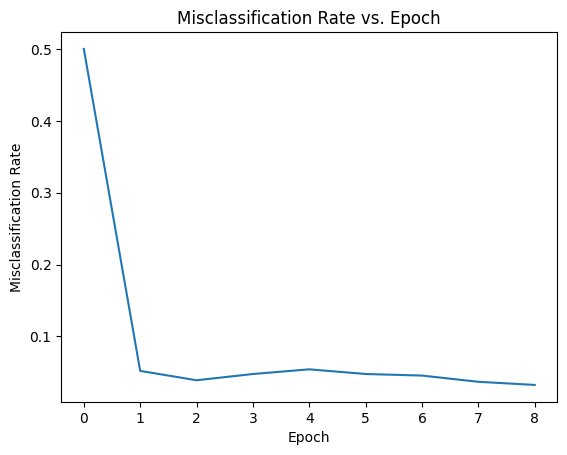

In [188]:
plot_misclassification(run_perceptron_miscallification("voting.arff"))

Using the Peceptron model with random_state variable set to 9876, I found that it converged after 8 epochs. So, using the score function to calculate the miscallification rate, the above graph resulted. At 0 epochs, the model is at 50% (since it is purely random if it is correct or not). But, immediately after, on the second epoch, the misscalification rate dropped down to less than 10%. I was surprised to see how quickly it dropped. This means that the model learned very quickly. So, it makes sense that it only took 8 epochs to converge.

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [189]:
# Run the model with different hyperparameters
def run_perceptron_hyperparameters(data_set, shuffle=False, eta0=1,
                                   verbose=0, fit_intercept=True,
                                   random_state=0, warm_start=False):
    """
    Run the Perceptron model on a full data set (after training)

    Args:
        data_set (string): the .arff set used for the inputs and target
        shuffle: Shuffling the data after each epoch
        eta0: Learning rate
        verbose: Print information after each epoch
        fit_intercept: Whether to use a bias or not
        Random state: random seed
        Warm Start: Whether or not the model runs from the previous one

    Output:
        clf.score(X, y): Accuracy
        clf.n_iter_: Number of epochs
        clf.coef_: weights
        clf.intercept_: Bias
    """
    #set up perceptron model with Learning rate 1, and no shuffling
    clf = Perceptron(shuffle=shuffle, eta0=eta0, verbose=verbose,
                     fit_intercept=fit_intercept, random_state=random_state,
                     warm_start=warm_start)

    #import the data from arff file into a numpy array of floats
    Data_Set = arff.loadarff(data_set)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()

    #separate data into array of inputs and targets
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]

    #convert bytes with "yes" to 1, and bytes with "no" to 0
    X[X == b'y'] = 1
    X[X == b'n'] = 0
    X = X.astype(float)

    #convert class of republican to 1, and class of democrat to 0
    y[y == b'republican'] = 1
    y[y == b'democrat'] = 0
    y = y.astype(float)

    #train the model
    clf.fit(X, y)

    #print statements to see how the parameters affected the model
    print("Perceptron with:")
    print(f"\tshuffle: {shuffle}")
    print(f"\teta0: {eta0}")
    print(f"\tverbose: {verbose}")
    print(f"\tfit_intercept: {fit_intercept}")
    print(f"\trandom_state: {random_state}")
    print(f"\twarm_start: {warm_start}")
    print("Accuracy: ", clf.score(X, y))
    print("Number of epochs: ", clf.n_iter_)
    print("Weights: ", clf.coef_)
    print("Bias: ", clf.intercept_)
    return


In [190]:
#run the model with various parameters

run_perceptron_hyperparameters("voting.arff")
print()
run_perceptron_hyperparameters("voting.arff", shuffle=True)
print()
run_perceptron_hyperparameters("voting.arff", eta0=0.01)
print()
run_perceptron_hyperparameters("voting.arff", verbose=1)
print()
run_perceptron_hyperparameters("voting.arff", fit_intercept=False)
print()
run_perceptron_hyperparameters("voting.arff", random_state=876)
print()
run_perceptron_hyperparameters("voting.arff", warm_start=True)

Perceptron with:
	shuffle: False
	eta0: 1
	verbose: 0
	fit_intercept: True
	random_state: 0
	warm_start: False
Accuracy:  0.9674620390455532
Number of epochs:  8
Weights:  [[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
Bias:  [-9.]

Perceptron with:
	shuffle: True
	eta0: 1
	verbose: 0
	fit_intercept: True
	random_state: 0
	warm_start: False
Accuracy:  0.9609544468546638
Number of epochs:  9
Weights:  [[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
Bias:  [-9.]

Perceptron with:
	shuffle: False
	eta0: 0.01
	verbose: 0
	fit_intercept: True
	random_state: 0
	warm_start: False
Accuracy:  0.9566160520607375
Number of epochs:  6
Weights:  [[ 2.00000000e-02 -3.00000000e-02 -5.00000000e-02  1.60000000e-01
   2.00000000e-02 -2.00000000e-02  1.00000000e-02  3.00000000e-02
  -7.00000000e-02  1.00000000e-02 -9.00000000e-02  4.00000000e-02
  -1.00000000e-02 -3.46944695e-18 -2.00000000e-02  5.00000000e-02]]
Bias:  [-0.06]

-- Epoch 1
Norm: 1

To test out the different Hyperparameters, I made them parameters to my function definition. Then, I called my function wich ran the Perceptron model multiple times to test the effects of each hyperparameter.

The shuffle parameter determines whether or not the training set should be shuffled after each epoch. I think that this makes large models more accurate by eliminating the effect of the order of input. In our case, setting shuffle to true actually decreased the accuracy a little. This surprised me. I think that it occured becuase the accuracy calculated is based purely on the training set. However, I would expect the testing accuracy to improve with shuffling set to true.

The eta0 parameter sets the learning rate. When the value is low, the model takes longer to learn but is more accurate. In this case, when I set the eta0 to a low number of 0.01, I was surprised to see the number of epochs decrease. This is probably becuase the data set was small and easy to predict. Also, I noted that decreasing the learning rate also had an effect on the final weights, making all of them much smaller (but by the same factor each time). This makes sense since the Learning rate is part of the weight change formula.

The verbose parameter specifies if running the Perceptron will print anything or not. When verbose is 0, no print statements are done. And, when verbose is 1, the algorithm provides data after each epoch.

The fit_intercept specifies whether to use a bias weight. When I set it to false, the final bias was 0 and the weights changed. Also, the accuracy decreased. I think that it is almost always better to have a bias, unless you know for a fact that the linear separation passes through the origin.

The random_state parameter specifies the random seed used in the algorithm. It didn't have much effect on our program. All of the weights and bias remained the same. I think that this variable can be used to determine if the resulting weights depend on the random function or not. If they do, the model is not accurate.

Finally, the warm start variable determines if the data should be taken form a previous model or start from scratch. Since our data converged so quickly, it also had no effect. But, I can see this parameter being useful if you want to take data out at each epoch.

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [191]:
# Load and Train on your dataset and report results
def run_perceptron_breast_cancer(training=True):
    """
    Run the Perceptron model on the breast cancer data set

    Arguments
        training: If true, the model splits into training and test sets

    Perceptron specifications:
        shuffle=False: No shuffling
        verbose=1: Print information after each epoch
        eta0=1: Learning rate is 1
        By default, the initial rates are all 0 and there is a bias

    Output:
        clf.score(X_train, y_train): Training Accuracy
        clf.score(X_test, y_test): Test Accuracy
        clf.n_iter_: Number of epochs
        clf.coef_: weights
        clf.intercept_: Bias
    """
    #set up perceptron model with Learning rate 0.5, and shuffling
    clf = Perceptron(shuffle=True, verbose=0, eta0=0.5)

    #initialize the list that will contain the data
    data = []

    #import the data file, line by line
    with open("wdbc.data", "r") as file:
        data_set = file.read().splitlines()

    #separate each line into a list and append to data
    for line in data_set:
        data.append(line.split(","))

    #convert the data into an array
    Data_Set_df = pd.DataFrame(data)
    data = Data_Set_df.to_numpy()

    #separate data into array of inputs and targets
    X = data[:, 2:] #ignore first two data values (ID number and target)
    y = data[:, 1]

    #convert input data to floats and normalize it
    X = X.astype(float)
    X = (X-np.min(X))/(np.max(X)-np.min(X))

    #convert class of malignant cancer to 1, and class of benign cancer to 0
    y[y == 'M'] = 1
    y[y == 'B'] = 0
    y = y.astype(float)

    #when training, we split the set into training and test set
    if training == True:
      #randomly split the data into test and training (70%)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

      #train the model
      clf.fit(X_train, y_train)

      #return data of the model
      return clf.score(X_train, y_train), clf.score(X_test, y_test), clf.n_iter_, clf.coef_, clf.intercept_

    else:
      #train the model
      clf.fit(X, y)

      #return data of the model
      return clf.score(X, y), clf.n_iter_, clf.coef_, clf.intercept_

In [192]:
table_data = [["Trial", "Training Accuracy",	"Test accuracy",	"Number of epochs"]]

#Run the perceptron 5 times with different splits and gather data
print("--------Training Set--------")
for i in range(10):
    training_accuracy, test_accuracy, epochs, weight, bias = run_perceptron_breast_cancer()
    data_to_add = [i+1, training_accuracy, test_accuracy, epochs]
    table_data.append(data_to_add)

#Make a table
table = tabulate(table_data, headers="firstrow")
print(table)

#Run the test on everything
accuracy, epochs, weight, bias = run_perceptron_breast_cancer(training=False)
print()
print("On the entire data set, we have:")
print("Accuracy: ", accuracy)
print("Number of epochs: ", epochs)
print("Weights: ", weight[0])
print("Bias: ", bias)



--------Training Set--------
  Trial    Training Accuracy    Test accuracy    Number of epochs
-------  -------------------  ---------------  ------------------
      1             0.884422         0.888889                   8
      2             0.849246         0.888889                  10
      3             0.876884         0.900585                  10
      4             0.907035         0.918129                   9
      5             0.886935         0.906433                   8
      6             0.839196         0.77193                   17
      7             0.884422         0.871345                   8
      8             0.859296         0.853801                   8
      9             0.856784         0.859649                   7
     10             0.90201          0.900585                  13

On the entire data set, we have:
Accuracy:  0.9086115992970123
Number of epochs:  15
Weights:  [-5.13399154e-03  2.59543959e-01  1.02482370e-01 -4.61212976e-02
  1.20969911e-03  

For this problem, I took a data set from https://archive-beta.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. This data was created to help researchers determine if breast cancer is malignant (1) or benign (0). The inputs for the data set were based on the data from 3 sample cells taken from the patient. The radius, texture, perimeter, area, and many other measurements were taken for each cell. So, the input list had a total of 30 inputs, each as real numbers (which were normalized).

I run the Perceptron model on 10 different splits for the training set. The average test accuracy for those sets was around 80-85%. But, every once in a while a trial or two in the group of 10 had an accuracy below 40%. So, Perceptron may not be the best model for this specific set of data. This is likely becuase of the large size of the input data. As the inputs increase, the probability for it to be linearly separable decreases (limiting the accuracy of the Perceptron model). However, this model was still much better than 50% overall. So, it may be applied to help aid medical research in the field.

After training the data, I ran the Perceptron model on the entire set. It converged after 15 epochs. The final bias was around -1.5 and most of the weights were very low numbers. The largest weights were the second and third input of each cell, which measured the cell texture and cell perimeter. So, we can conclude that as breast cancer cells get more rough and/or increase in perimeter, the cancer is more likely to be malignant.

## 5. (Optional 15% extra credit) Code up your own perceptron learner

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [193]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

#JUST FINISHED PREDICTION METHOD, MAYBE WORK ON FIT NOW

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, X, y, lr=.1, shuffle=True):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
            X (numpy array): Training Data
            y (numpy array): Target
            weights: Weights used in the model
        """
        self.lr = lr
        self.shuffle = shuffle
        self.initialize_training_set(X)
        self.initialize_target_set(y)
        self.initialize_weights()
        self.epochs = 0

    def fit(self, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        if initial_weights:  #set initial weights to what the user inputs
            self.weights = initial_weights

        scores = []
        score_difference = 1 #default value
        while score_difference > 0.002:
            #change the weights for each patterin in the epic
            for pattern in range(len(self.y) - 1):
                delta_weights = self.lr * (self.y[pattern] - self.predict(self.X[pattern])) * self.X[pattern]
                self.weights += delta_weights

            #update the number of epochs and list of scores
            self.epochs += 1
            scores.append(self.score())

            #calculate the score_difference by comparing the mean to the last three scores
            if self.epochs >= 3:   #need at least 3 for convergence
                score_difference = 0
                score_sum = scores[self.epochs - 1] + scores[self.epochs - 2] + scores[self.epochs - 3]
                score_average = score_sum / 3
                score_difference += abs(scores[self.epochs - 1] - score_average)
                score_difference += abs(scores[self.epochs - 2] - score_average)
                score_difference += abs(scores[self.epochs - 3] - score_average)
        return self

    def predict(self, X):
        """
            Predict all classes for a dataset X
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        net = X @ self.weights   #sums the product of x_i and w_i
        # net = list(net) # to allow for list comprehension
        # net = [1 if x > 0 else 0 for x in net] #change net to predictions
        if net > 0:
            net = 1
        else:
            net = 0
        return net

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Initializes the weights attribute as a numpy array of only 0s
        """
        n = len(self.X[0])  #number of elements in first row of inputs
        self.weights = np.zeros(n)
        return

    def initialize_training_set(self, X):
        """Initialize the training set
        Adds the bias to the end of each pattern

        Arg: X --> Initial input set as a matrix given by the user
        """
        self.X = []
        bias = np.array([1])
        for row in X:
            self.X.append(np.concatenate((row, bias)))
        self.X = np.array(self.X)

    def initialize_target_set(self, y):
        """Initialize the target set
        Adds the bias to the end of each pattern

        Arg: X --> Initial input set as a matrix given by the user
        """
        bias = np.array([1])
        self.y = np.concatenate((y, bias))
        self.y = np.array(self.y)

    def score(self):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        #calculate output for all current weights
        net = self.X @ self.weights   #sums the product of x_i and w_i
        net = list(net) # to allow for list comprehension
        net = [1 if x > 0 else 0 for x in net] #change net to predictions
        net = np.array(net)

        #find the number of incorrect predictions
        num_incorrect = 0
        for i in range(len(self.y) - 1):
            if net[i] != self.y[i]:
                num_incorrect += 1

        #return the percent of incorrect
        return 1 - (num_incorrect / (len(self.y) - 1))

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        return self.weights

In [194]:
#Run the Perceptron on evaluation data
print("-----Evaluation Data-----")
#import the data from arff file into a numpy array of floats
Data_Set = arff.loadarff("eval.arff")
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)

#separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

#train the model, printing results after each epoch
clf = PerceptronClassifier(X, y)
clf.fit()

print("Weights and Bias: ", clf.weights) #print the weights and bias
print("Accuracy: ", clf.score())  #mean accuracy
print("Number of epochs: ", clf.epochs)



#Run the Perceptron on voting data
print()
print("-----Voting Data-----")
#import the data from arff file into a numpy array of floats
#import the data from arff file into a numpy array of floats
Data_Set = arff.loadarff("voting.arff")
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()

#separate data into array of inputs and targets
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

#convert bytes with "yes" to 1, and bytes with "no" to 0
X[X == b'y'] = 1
X[X == b'n'] = 0
X = X.astype(float)

#convert class of republican to 1, and class of democrat to 0
y[y == b'republican'] = 1
y[y == b'democrat'] = 0
y = y.astype(float)

#train the model, printing results after each epoch
clf = PerceptronClassifier(X, y)
clf.fit()

print("Weights and Bias: ", clf.weights) #print the weights and bias
print("Accuracy: ", clf.score())  #mean accuracy
print("Number of epochs: ", clf.epochs)

-----Evaluation Data-----
Weights and Bias:  [-3.07391142 -1.7218     -2.1175274  -1.5410362   4.4       ]
Accuracy:  0.9613702623906706
Number of epochs:  6

-----Voting Data-----
Weights and Bias:  [ 0.1 -0.3 -0.7  2.1  0.1 -0.1  0.2  0.7 -0.9  0.4 -1.3  0.1  0.1 -0.1
 -0.3  0.8 -1.3]
Accuracy:  0.96529284164859
Number of epochs:  121


I created a version of the Perceptron model using the PrrceptronClassifier class. This class ran on the same data and used the formulas we used from class to determine the weights. I made it different from the scikit-learn version by making the input and target sets only need to be inputs for the class initialization (preventing the need to use them as arguments for the fit() and score() methods).

When I ran my Perceptron class on the evaluation data, it has a 96.1% accuracy after 6 epochs. On the other hand, the scikit-learn version has a 97.7% accuracy after 9 epochs. So, my model performed quite similarly. The only difference notable difference may be my criteria for determining convergence.

When I ran my Perceptron model on the voting data set, I had an accuracy of 96.5% after 121 epochs, whereas the scikit-learn model had 96.7% accuracy after 8. So, clearly, the scikit-learn is better in this case because it is more accurate and requires much less iterations.

All in all, it was a meaningful experience to code up the Perceptron model myself. I now understand how this machine learning model works. If I were to implement methods to split up the data into training and test sets, randomly shuffle, and so on, I believe that my model could be even more accurate.